In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import os
import seaborn as sns
import squarify
import tabulate

2023-06-28 09:55:34.714572: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
df_data = pd.read_csv('/Users/andycode/Downloads/SucideData.csv')

# Drop the year 2016
df_data = df_data[df_data['year'] != 2016]

# Drop the columns 'HDI for year' and 'country-year'
df_data = df_data.drop(['HDI for year', 'country-year'], axis=1)

df_data = df_data.drop(['gdp_per_capita'], axis=1)

# Print the DataFrame
print(df_data)

          country  year     sex          age  suicides_no  population  \
0         Albania  1987    male  15-24 years           21      312900   
1         Albania  1987    male  35-54 years           16      308000   
2         Albania  1987  female  15-24 years           14      289700   
3         Albania  1987    male    75+ years            1       21800   
4         Albania  1987    male  25-34 years            9      274300   
...           ...   ...     ...          ...          ...         ...   
27815  Uzbekistan  2014  female  35-54 years          107     3620833   
27816  Uzbekistan  2014  female    75+ years            9      348465   
27817  Uzbekistan  2014    male   5-14 years           60     2762158   
27818  Uzbekistan  2014  female   5-14 years           44     2631600   
27819  Uzbekistan  2014  female  55-74 years           21     1438935   

       suicides/100k pop    gdp_for_year       generation  
0                   6.71   2,156,624,900     Generation X  
1  

In [3]:
df_data.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,gdp_for_year,generation
0,Albania,1987,male,15-24 years,21,312900,6.71,"2,156,624,900",Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,"2,156,624,900",Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,"2,156,624,900",Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,"2,156,624,900",G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,"2,156,624,900",Boomers


In [4]:
#printing the different columns of the data
df_data.keys()

Index(['country', 'year', 'sex', 'age', 'suicides_no', 'population',
       'suicides/100k pop', ' gdp_for_year', 'generation'],
      dtype='object')

In [5]:
print(df_data.shape)

(27660, 9)


In [6]:
df_data.head(270)

,country,year,sex,age,suicides_no,population,suicides/100k pop,gdp_for_year,generation
0,Albania,1987,male,15-24 years,21,312900,6.71,"2,156,624,900",Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,"2,156,624,900",Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,"2,156,624,900",Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,"2,156,624,900",G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,"2,156,624,900",Boomers
...,...,...,...,...,...,...,...,...,...
265,Antigua and Barbuda,1985,female,25-34 years,0,6344,0.00,"240,923,926",Boomers
266,Antigua and Barbuda,1985,female,35-54 years,0,6173,0.00,"240,923,926",Silent
267,Antigua and Barbuda,1985,female,5-14 years,0,7339,0.00,"240,923,926",Generation X
268,Antigua and Barbuda,1985,female,55-74 years,0,3778,0.00,"240,923,926",G.I. Generation


In [7]:
mean = df_data.mean(axis=0, numeric_only = True)
std = df_data.std(axis=0, numeric_only = True)

print(mean)
print(std)

year                 2.001173e+03
suicides_no          2.434135e+02
population           1.850689e+06
suicides/100k pop    1.281260e+01
dtype: float64
year                 8.418754e+00
suicides_no          9.044902e+02
population           3.920658e+06
suicides/100k pop    1.897206e+01
dtype: float64


In [8]:
df_1987_1992 = df_data.loc[df_data['year'].between(1987, 1992)]

In [9]:
print(df_1987_1992.shape)

(4176, 9)


In [10]:
mean_1987_1992 = df_1987_1992.mean(axis=0, numeric_only = True)
print(mean_1987_1992)

year                 1.989661e+03
suicides_no          2.420896e+02
population           1.891951e+06
suicides/100k pop    1.287926e+01
dtype: float64


In [11]:
years = [1987, 1988, 1989, 1990, 1991, 1992]

for year in years:
    mean = df_1987_1992[df_1987_1992["year"] == year]["suicides_no"].mean()
    print(year, mean)

1987 195.74382716049382
1988 205.8265306122449
1989 256.80128205128204
1990 251.77213541666666
1991 257.8385416666667
1992 271.1192307692308


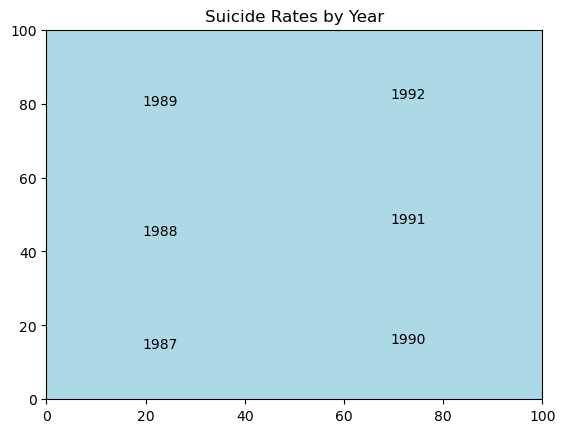

In [12]:
#Experimenting with Treetop graph

# Create a DataFrame with the data
#df_data = pd.DataFrame({
  "year": [1987, 1988, 1989, 1990, 1991, 1992],
  "suicides_no": [196, 205, 256, 251, 257, 271],
})

# Create a dictionary to store the means
#means = {}
#for year in range(1987, 1993):
    mean = df_data[df_data["year"] == year]["suicides_no"].mean()
    means[year] = mean

# Create a NumPy array to store the means
#means_array = np.array([means[1987], means[1988], means[1989], means[1990], means[1991], means[1992]])

# Create a squarify plot
#squarify.plot(means_array, label=means.keys(), color="lightblue")

# Add a title
#plt.title("Suicide Rates by Year")

# Show the plot
#plt.show()

In [12]:
df_data.describe()

,year,suicides_no,population,suicides/100k pop
count,27660.000000,27660.000000,2.766000e+04,27660.000000
mean,2001.173102,243.413485,1.850689e+06,12.812597
std,8.418754,904.490185,3.920658e+06,18.972063
min,1985.000000,0.000000,2.780000e+02,0.000000
25%,1994.000000,3.000000,9.753525e+04,0.910000
50%,2002.000000,25.000000,4.307250e+05,5.980000
75%,2008.000000,132.000000,1.491041e+06,16.602500
max,2015.000000,22338.000000,4.380521e+07,224.970000


In [13]:
df_1987_1992.describe()

,year,suicides_no,population,suicides/100k pop
count,4176.000000,4176.000000,4.176000e+03,4176.000000
mean,1989.660920,242.089559,1.891951e+06,12.879265
std,1.710542,803.482913,3.772121e+06,17.977913
min,1987.000000,0.000000,2.780000e+02,0.000000
25%,1988.000000,3.000000,9.680000e+04,0.880000
50%,1990.000000,25.000000,4.225500e+05,6.600000
75%,1991.000000,152.000000,1.751900e+06,17.390000
max,1992.000000,15824.000000,3.415660e+07,177.610000


In [20]:
suicides_by_year = df_data.groupby('year')['suicides/100k pop'].mean()

print(suicides_by_year)

year
1985    11.826198
1986    11.423333
1987    11.644213
1988    12.709405
1989    12.879071
1990    12.862956
1991    13.438880
1992    13.498564
1993    13.833705
1994    14.073272
1995    15.662671
1996    15.305422
1997    14.954361
1998    14.926920
1999    14.532038
2000    13.941328
2001    13.519138
2002    13.786550
2003    13.205019
2004    12.481944
2005    12.068442
2006    11.927461
2007    12.025339
2008    11.907686
2009    11.400787
2010    11.215900
2011    11.015349
2012    11.421718
2013    11.107958
2014    11.011464
2015    11.094073
Name: suicides/100k pop, dtype: float64


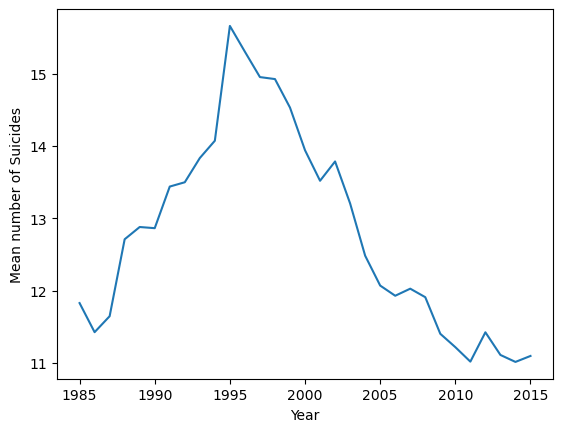

In [21]:
#plot the mean of suicides per year
plt.plot(suicides_by_year.index, suicides_by_year.values)
plt.xlabel('Year')
plt.ylabel('Mean number of Suicides')
plt.show()

In [16]:
def get_generation(year):
    if year < 1945:
        return "Silent Generation"
    elif year < 1965:
        return "Baby Boomers"
    elif year < 1981:
        return "Generation X"
    elif year < 1996:
        return "Millennials"
    else:
        return "Generation Z"  

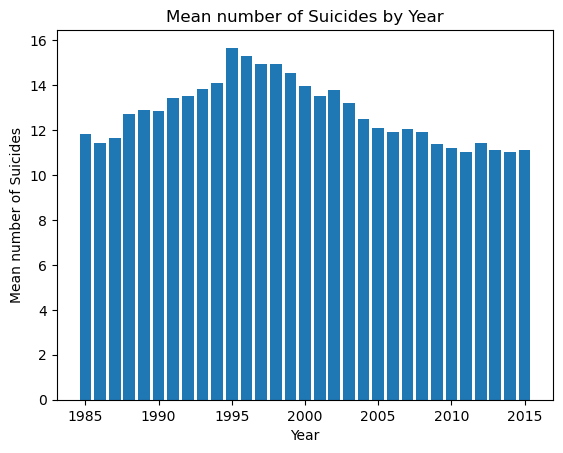

In [22]:
#More visual view of the previous graph
#Getting the mean number of suicides by year
suicides_by_year = df_data.groupby('year')['suicides/100k pop'].mean()

#create a bar graph
plt.bar(suicides_by_year.index, suicides_by_year.values)

#Add a title
plt.title('Mean number of Suicides by Year')

#Add labels to the x-axis
plt.xlabel('Year')

#Add label to the y-axis
plt.ylabel('Mean number of Suicides')

#show the grpah
plt.show()

In [23]:
# Calculate the mean number of suicides for each year
years_87_92 = [1987, 1988, 1989, 1990, 1991, 1992]

for year in years:
    # Calculate the mean number of suicides for the specified year
    mean = df_1987_1992[df_1987_1992['year'] == year]['suicides_no'].mean()

    # Get the country for the specified year
    country = df_1987_1992[df_1987_1992['year'] == year]['country'].unique()[0]

    # Print the year, mean, and country
    print(year, mean, country)

# Convert the data into strings
print(df_1987_1992.to_string())

# Transfer the data into a NumPy array
datanp_87_92 = df_1987_1992.to_numpy()

datanp_87_92 = datanp_87_92.dropna(subset=['suicides_no'])

# Print the first 10 rows of the NumPy array
year_array = datanp_87_92[:10, 0]
suicides_no_array = datanp_87_92[:10, 1]
country_array = datanp_87_92[:10, 2]

1987 195.74382716049382 Albania
1988 205.8265306122449 Albania
1989 256.80128205128204 Albania
1990 251.77213541666666 Antigua and Barbuda
1991 257.8385416666667 Antigua and Barbuda
1992 271.1192307692308 Albania
                            country  year     sex          age  suicides_no  population  suicides/100k pop       gdp_for_year       generation
0                           Albania  1987    male  15-24 years           21      312900               6.71      2,156,624,900     Generation X
1                           Albania  1987    male  35-54 years           16      308000               5.19      2,156,624,900           Silent
2                           Albania  1987  female  15-24 years           14      289700               4.83      2,156,624,900     Generation X
3                           Albania  1987    male    75+ years            1       21800               4.59      2,156,624,900  G.I. Generation
4                           Albania  1987    male  25-34 years          

AttributeError: 'numpy.ndarray' object has no attribute 'dropna'

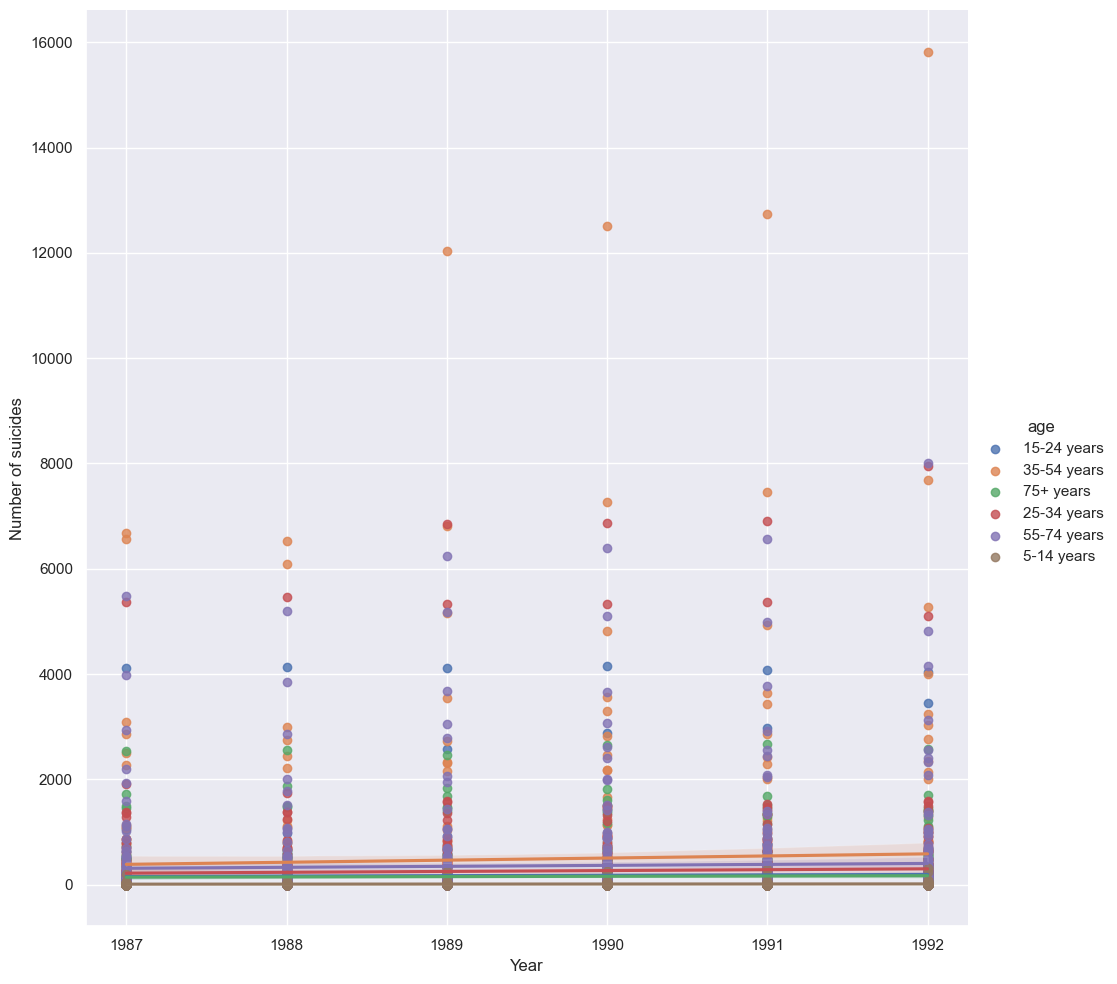

In [52]:
sns.set_theme()

# Plot suicides_no as a function of years across age groups
g = sns.lmplot(
    data=df_1987_1992,
    x="year", y="suicides_no", hue="age",
    height=10
)

# Use more informative axis labels than are provided by default
g.set_axis_labels("Year", "Number of suicides")

# Show the plot
plt.show()